# Generating data bi-variant normal distribution x and y


In [1]:
import numpy as np
import scipy.integrate
from scipy.stats import chisquare, chi2
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(42)
data_x = np.random.normal(loc=25, scale=5, size=1000)  # x data with mean=25 and std=5
data_y = np.random.normal(loc=25, scale=5, size=1000)  # y data with mean=25 and std=5

# Now binning the data x and y (number of bins = 10)

In [2]:
num_bins = 10
hist, xedges, yedges = np.histogram2d(data_x, data_y, bins=num_bins)

# Observed counts in each bins from data x and y and bin edges

In [3]:
# Observed counts in each bins
print(hist)
print()
#bin edges for x and y
print("binedges for x", xedges)
print()
print('binedges for y', yedges)

[[ 0.  0.  0.  0.  1.  1.  2.  0.  0.  0.]
 [ 0.  0.  3.  3.  8.  2.  4.  1.  1.  0.]
 [ 1.  3.  7. 14. 18. 27. 13. 10.  3.  0.]
 [ 8.  6. 12. 26. 56. 59. 40. 15.  6.  0.]
 [ 1.  6. 25. 43. 74. 60. 45. 10.  7.  1.]
 [ 1.  4. 18. 49. 53. 45. 29. 18.  5.  4.]
 [ 1.  4. 10. 21. 28. 18. 11.  8.  3.  0.]
 [ 0.  2.  3.  7.  7. 12.  2.  5.  0.  0.]
 [ 0.  0.  1.  2.  2.  2.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]

binedges for x [ 8.7936633  12.34066272 15.88766213 19.43466155 22.98166096 26.52866038
 30.07565979 33.62265921 37.16965862 40.71665804 44.26365745]

binedges for y [10.29805683 13.36480493 16.43155303 19.49830113 22.56504923 25.63179733
 28.69854543 31.76529354 34.83204164 37.89878974 40.96553784]


# Using PDF and integrating in each bin to get expected number of counts

## first defining pdf

In [4]:
# Bivariate normal PDF function
def bivariate_normal_pdf(x, y, mean_x, mean_y, std_x, std_y):
    coef = 1 / (2 * np.pi * std_x * std_y)
    exponent = -0.5 * ((x - mean_x)**2 / std_x**2 + (y - mean_y)**2 / std_y**2)
    return coef * np.exp(exponent)

## second defining the integration

In [5]:
 #Function to integrate
def integrand(y, x):
    return bivariate_normal_pdf(x, y, mean_x, mean_y, std_x, std_y)


## third evaluating the expected counts by integrating by pdf * number of data

In [6]:
# Initialize array to hold expected counts
expected_counts = np.zeros((num_bins, num_bins))

# Calculate statistics
mean_x = np.mean(data_x)
std_x = np.std(data_x)
mean_y = np.mean(data_y)
std_y = np.std(data_y)


# Calculate expected counts for each bin
for i in range(num_bins):
    for j in range(num_bins):
        # Define the edges of the bin
        x_min, x_max = xedges[i], xedges[i + 1]
        y_min, y_max = yedges[j], yedges[j + 1]
        
        # Perform double integration over the bin area
        count, error = scipy.integrate.dblquad(integrand, x_min, x_max, lambda x: y_min, lambda x: y_max)
        
        # Multiply by total number of data points to get expected count
        expected_counts[i, j] = count * len(data_x)

# Final expected and observed count

In [7]:
# Flatten the arrays for the Chi-squared test
observed_counts  = hist
observed_counts_flat = hist.flatten()
expected_counts_flat = expected_counts.flatten()

In [8]:
## observed Counts
print(hist)

[[ 0.  0.  0.  0.  1.  1.  2.  0.  0.  0.]
 [ 0.  0.  3.  3.  8.  2.  4.  1.  1.  0.]
 [ 1.  3.  7. 14. 18. 27. 13. 10.  3.  0.]
 [ 8.  6. 12. 26. 56. 59. 40. 15.  6.  0.]
 [ 1.  6. 25. 43. 74. 60. 45. 10.  7.  1.]
 [ 1.  4. 18. 49. 53. 45. 29. 18.  5.  4.]
 [ 1.  4. 10. 21. 28. 18. 11.  8.  3.  0.]
 [ 0.  2.  3.  7.  7. 12.  2.  5.  0.  0.]
 [ 0.  0.  1.  2.  2.  2.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


In [9]:
##expected Counts
np.set_printoptions(precision=0)
np.set_printoptions(suppress=True)
print(expected_counts)

[[ 0.  0.  0.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  1.  2.  4.  6.  6.  4.  2.  1.  0.]
 [ 1.  3.  8. 16. 22. 21. 14.  7.  2.  0.]
 [ 1.  6. 17. 35. 49. 47. 32. 15.  5.  1.]
 [ 2.  8. 24. 47. 66. 64. 43. 20.  6.  1.]
 [ 2.  7. 19. 39. 54. 52. 35. 16.  5.  1.]
 [ 1.  3.  9. 19. 27. 26. 17.  8.  3.  1.]
 [ 0.  1.  3.  6.  8.  8.  5.  2.  1.  0.]
 [ 0.  0.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


# Plotting CDF and count vs Binindex in both observed and expected counts

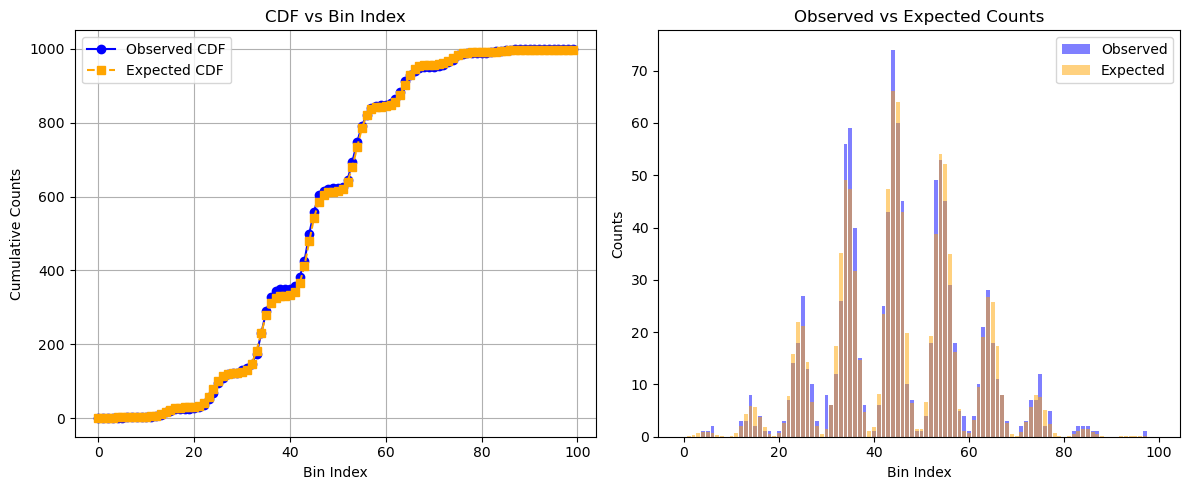

In [10]:
plt.figure(figsize=(12, 5))

# Plot observed histogram
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(observed_counts_flat), label='Observed CDF', marker='o', linestyle='-', color='blue')
plt.plot(np.cumsum(expected_counts_flat), label='Expected CDF', marker='s', linestyle='--', color='orange')
plt.xlabel('Bin Index')
plt.ylabel('Cumulative Counts')
plt.title('CDF vs Bin Index')
plt.legend()
plt.grid(True)


# Plot expected counts
plt.subplot(1, 2, 2)
plt.bar(range(len(observed_counts_flat)), observed_counts_flat, alpha=0.5, label='Observed', color='blue')
plt.bar(range(len(expected_counts_flat)), expected_counts_flat, alpha=0.5, label='Expected', color='orange')
plt.xlabel('Bin Index')
plt.ylabel('Counts')
plt.title('Observed vs Expected Counts')
plt.legend()

plt.tight_layout()
plt.show()

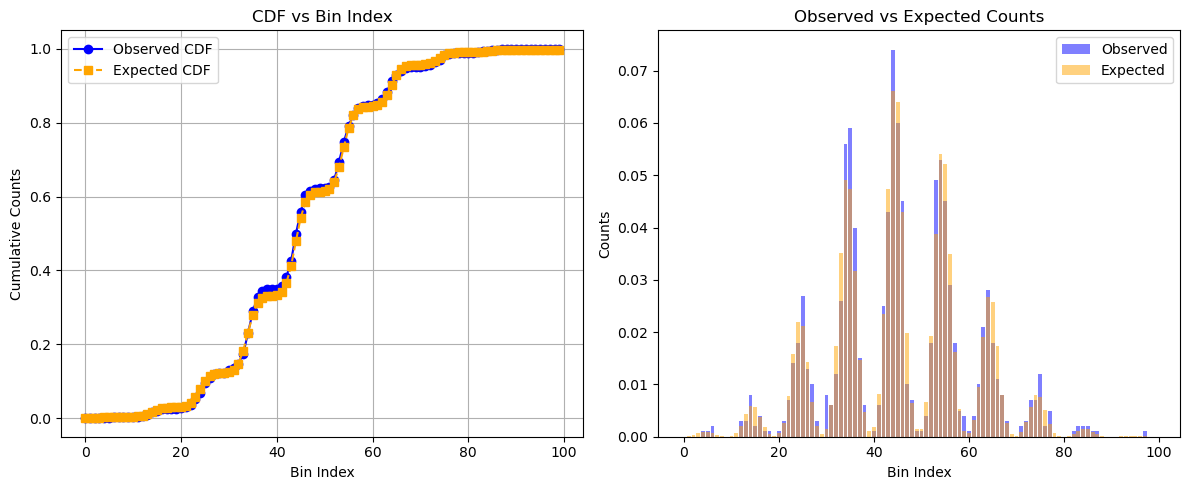

In [11]:
plt.figure(figsize=(12, 5))

# Plot observed histogram
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(observed_counts_flat)/1000, label='Observed CDF', marker='o', linestyle='-', color='blue')
plt.plot(np.cumsum(expected_counts_flat)/1000, label='Expected CDF', marker='s', linestyle='--', color='orange')
plt.xlabel('Bin Index')
plt.ylabel('Cumulative Counts')
plt.title('CDF vs Bin Index')
plt.legend()
plt.grid(True)


# Plot expected counts
plt.subplot(1, 2, 2)
plt.bar(range(len(observed_counts_flat)), observed_counts_flat/1000, alpha=0.5, label='Observed', color='blue')
plt.bar(range(len(expected_counts_flat)), expected_counts_flat/1000, alpha=0.5, label='Expected', color='orange')
plt.xlabel('Bin Index')
plt.ylabel('Counts')
plt.title('Observed vs Expected Counts')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting 2D histogram both Observed and expected counts

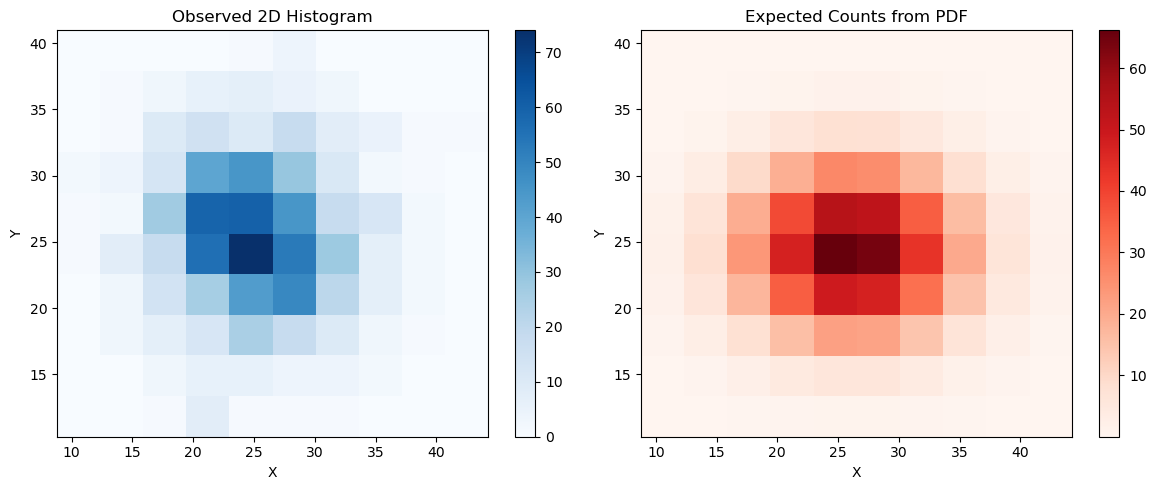

In [12]:
plt.figure(figsize=(12, 5))

# Plot observed histogram
plt.subplot(1, 2, 1)
plt.hist2d(data_x, data_y, bins=num_bins, cmap='Blues')
plt.colorbar()
plt.title('Observed 2D Histogram')
plt.xlabel('X')
plt.ylabel('Y')

# Plot expected counts
plt.subplot(1, 2, 2)
plt.imshow(expected_counts, interpolation='nearest', origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Reds', aspect='auto')
plt.colorbar()
plt.title('Expected Counts from PDF')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# Calculating chi-square statistics, degree of freedom 

In [13]:
#Calculate degrees of freedom
degrees_of_freedom = (num_bins ** 2) - 1  # Degrees of freedom for a 2D histogram

# Compute the chi-square statistic
chi_square_statistic = np.sum((observed_counts - expected_counts)**2 / expected_counts)

# Print the chi-square statistic
print("Chi-square Statistic:", chi_square_statistic)
print("Degrees of Freedom:", degrees_of_freedom)

Chi-square Statistic: 117.22371718246353
Degrees of Freedom: 99


# Calculating chi-square statistics using scipy library

In [46]:
#Sum the observed and expected counts
total_observed = np.sum(observed_counts_flat)
total_expected = np.sum(expected_counts_flat)

# Scale expected counts to match the total observed counts if necessary #code show up error here
if total_observed != total_expected:
    expected_counts_flat *= (total_observed / total_expected)

# Perform Chi-square goodness of fit test
chi_square_stat, p_value = chisquare(f_obs=observed_counts_flat, f_exp=expected_counts_flat)

# Calculate degrees of freedom
df = len(observed_counts_flat) - 1  # Degrees of freedom is typically number of bins - 1

# Calculate the critical value for 95% confidence
critical_value = chi2.ppf(0.95, df)

# Print the results
print("Chi-square Statistic:", chi_square_stat)
print("Degrees of Freedom:", df)
print("p-value:", p_value)
print("Critical Value (95% confidence):", critical_value)

# Check goodness of fit based on p-value and Chi-square statistic
if chi_square_stat > critical_value:
    print("The observed data significantly deviates from the expected distribution.")
    print("Consider rejecting the null hypothesis of good fit.")
else:
    print("The observed data fits the expected distribution within the chosen significance level.")
    print("Fail to reject the null hypothesis of goodness of fit.")

Chi-square Statistic: 116.9113678840174
Degrees of Freedom: 99
p-value: 0.1056370456034596
Critical Value (95% confidence): 123.2252214533618
The observed data fits the expected distribution within the chosen significance level.
Fail to reject the null hypothesis of goodness of fit.
